## Estudo da correlação entre variáveis e regressão

Na atividade desta semana, vamos revisitar um conjunto de dados já utilizado "bodyfat.csv".

1)  Dentre as variáveis apresentadas no arquivo, existe alguma no quais os dados não estejam bem distribuídos (utilizem os seus conhecimentos de estatística descritiva)?

2)  O conjunto de dados é uma importante ferramenta para estudo sobre obesidade. É possível que haja correlação entre as variáveis e o nível de gordura corporal (variável BodyFat). Faça o gráfico de dispersão de cada uma das variáveis com a variável BodyFat e calcule a correlação.

3)  Dos resultados encontrados, qual você indicaria para compor um modelo numérico para prever a gordura corporal? Explique os motivos da escolha baseados nas informações calculadas anteriormente.

4)  A partir das informações anteriores, tente achar uma reta de regressão com as variáveis encontradas no item anterior (regressão múltipla).

5)  Uma vez escolhida as melhores variáveis para representar a variável "Body Fat", escolham um modelo estatístico que melhor simule a variável, em função das variáveis escolhidas

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [13]:
dados = pd.read_csv('bodyfat.csv')
dados.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [22]:
dados.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


## Questão 1

Dentre as variáveis apresentadas no arquivo, existe alguma no quais os dados não estejam bem distribuídos (utilizem os seus conhecimentos de estatística descritiva)?

1) Bodyfat: Tem uma média de 19,15% com desvio padrão de 8,37%. O valor mínimo é 0, o que pode indicar um erro ou outlier.
2) Age: Média de 44,88 anos e desvio padrão de 12,60 anos. A distribuição é razoavelmente simétrica.
3) Weight: Média de 178,92 libras com desvio padrão de 29,39 libras. O valor máximo é muito alto (363,15), sugerindo a presença de outliers.
4) Height: Média de 70,15 polegadas com desvio padrão de 3,66 polegadas. A distribuição é relativamente simétrica.
5) Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist: As distribuições dessas medidas corporais também mostram variações, mas são relativamente simétricas, embora algumas apresentem caudas longas.

C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


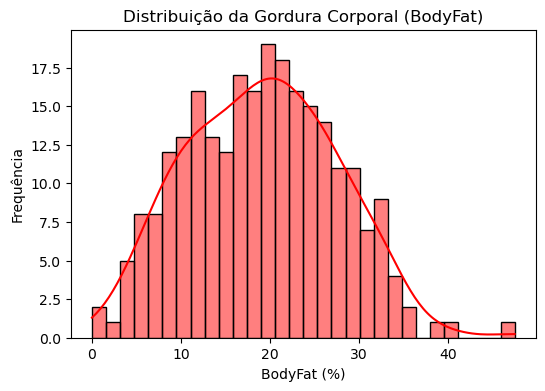

In [38]:
# Configurações para visualização
plt.figure(figsize=(6, 4))

sns.histplot(data['BodyFat'], kde=True, bins=30, color="red")
plt.title('Distribuição da Gordura Corporal (BodyFat)')
plt.xlabel('BodyFat (%)')
plt.ylabel('Frequência')
plt.show()

C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


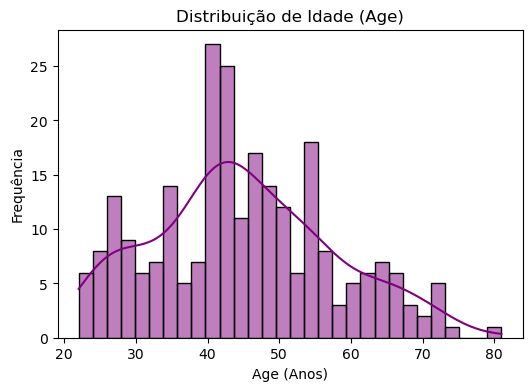

In [29]:
# Configurações para visualização
plt.figure(figsize=(6, 4))

sns.histplot(data['Age'], kde=True, bins=30, color="purple")
plt.title('Distribuição de Idade (Age)')
plt.xlabel('Age (Anos)')
plt.ylabel('Frequência')
plt.show()

C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


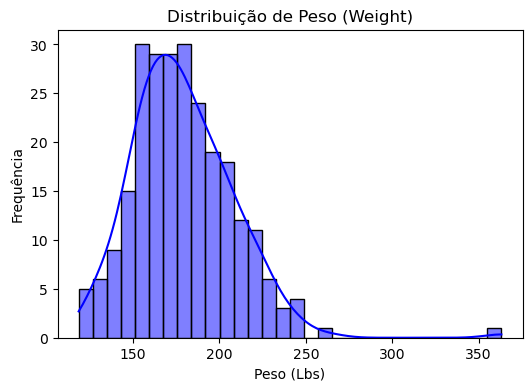

In [32]:
# Configurações para visualização
plt.figure(figsize=(6, 4))

sns.histplot(data['Weight'], kde=True, bins=30, color="blue")
plt.title('Distribuição de Peso (Weight)')
plt.xlabel('Peso (Lbs)')
plt.ylabel('Frequência')
plt.show()

C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


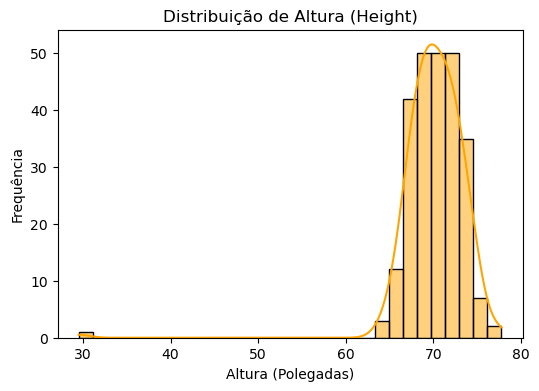

In [37]:
# Configurações para visualização
plt.figure(figsize=(6, 4))

sns.histplot(data['Height'], kde=True, bins=30, color="orange")
plt.title('Distribuição de Altura (Height)')
plt.xlabel('Altura (Polegadas)')
plt.ylabel('Frequência')
plt.show()

C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fbc2m\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

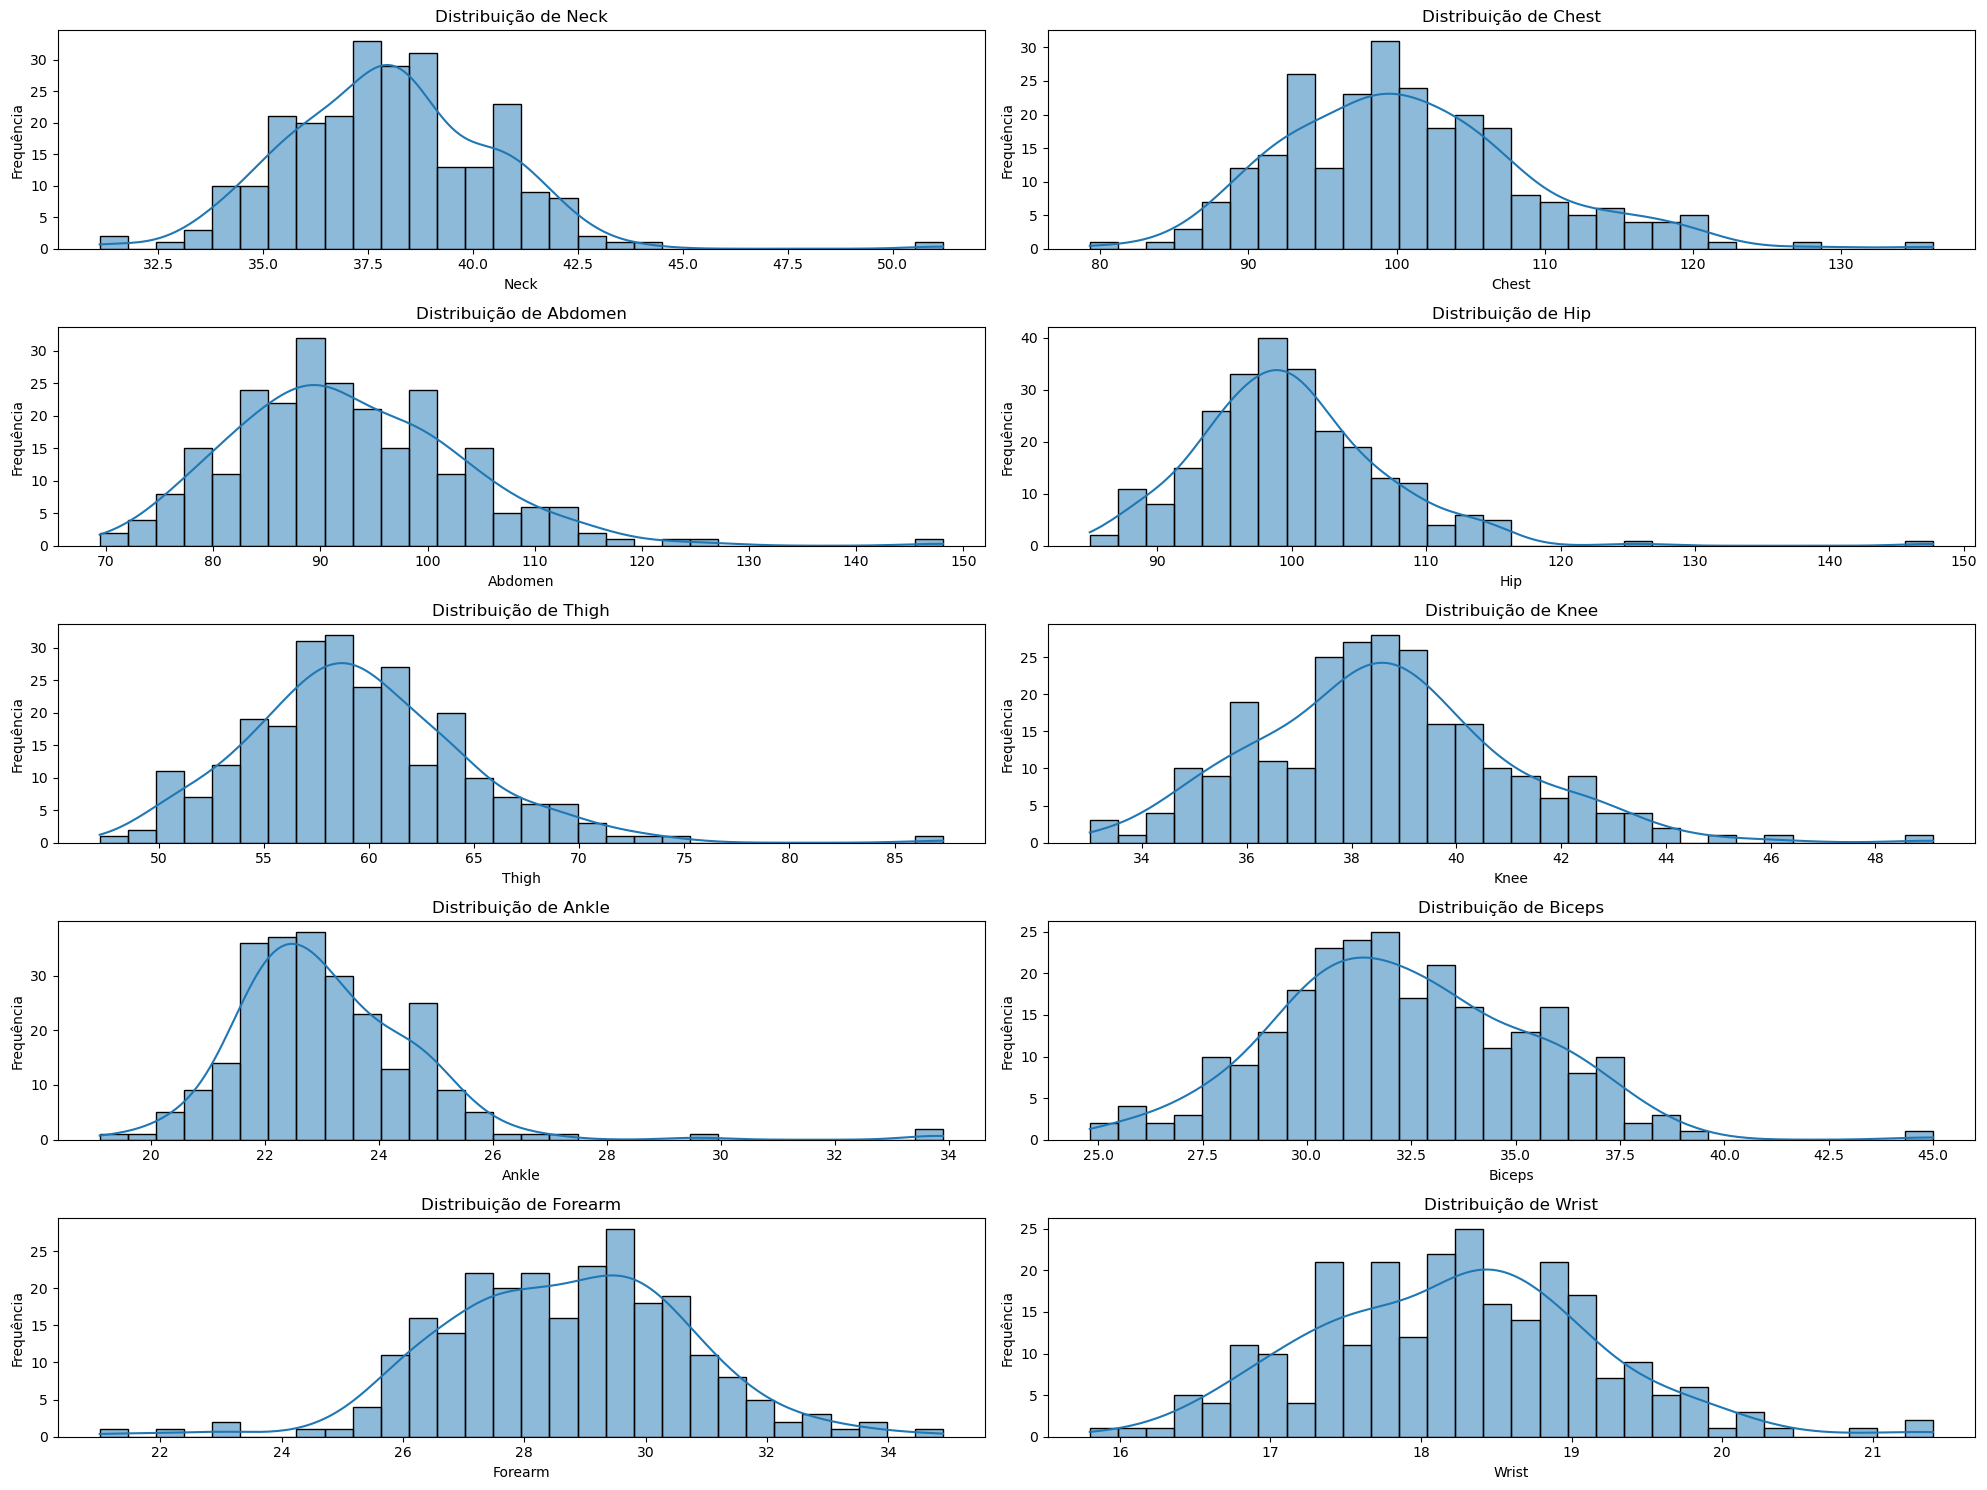

In [35]:
# Lista de variáveis para criar os histogramas
variables = ['Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']

# Configuração do tamanho da figura
plt.figure(figsize=(20, 15))

# Criar histogramas para cada variável
for i, var in enumerate(variables, 1):
    plt.subplot(5, 2, i)
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')

# Ajustar o layout para melhor visualização
plt.tight_layout()
plt.show()

## Questão 2
O conjunto de dados é uma importante ferramenta para estudo sobre obesidade. É possível que haja correlação entre as variáveis e o nível de gordura corporal (variável BodyFat). Faça o gráfico de dispersão de cada uma das variáveis com a variável BodyFat e calcule a correlação.

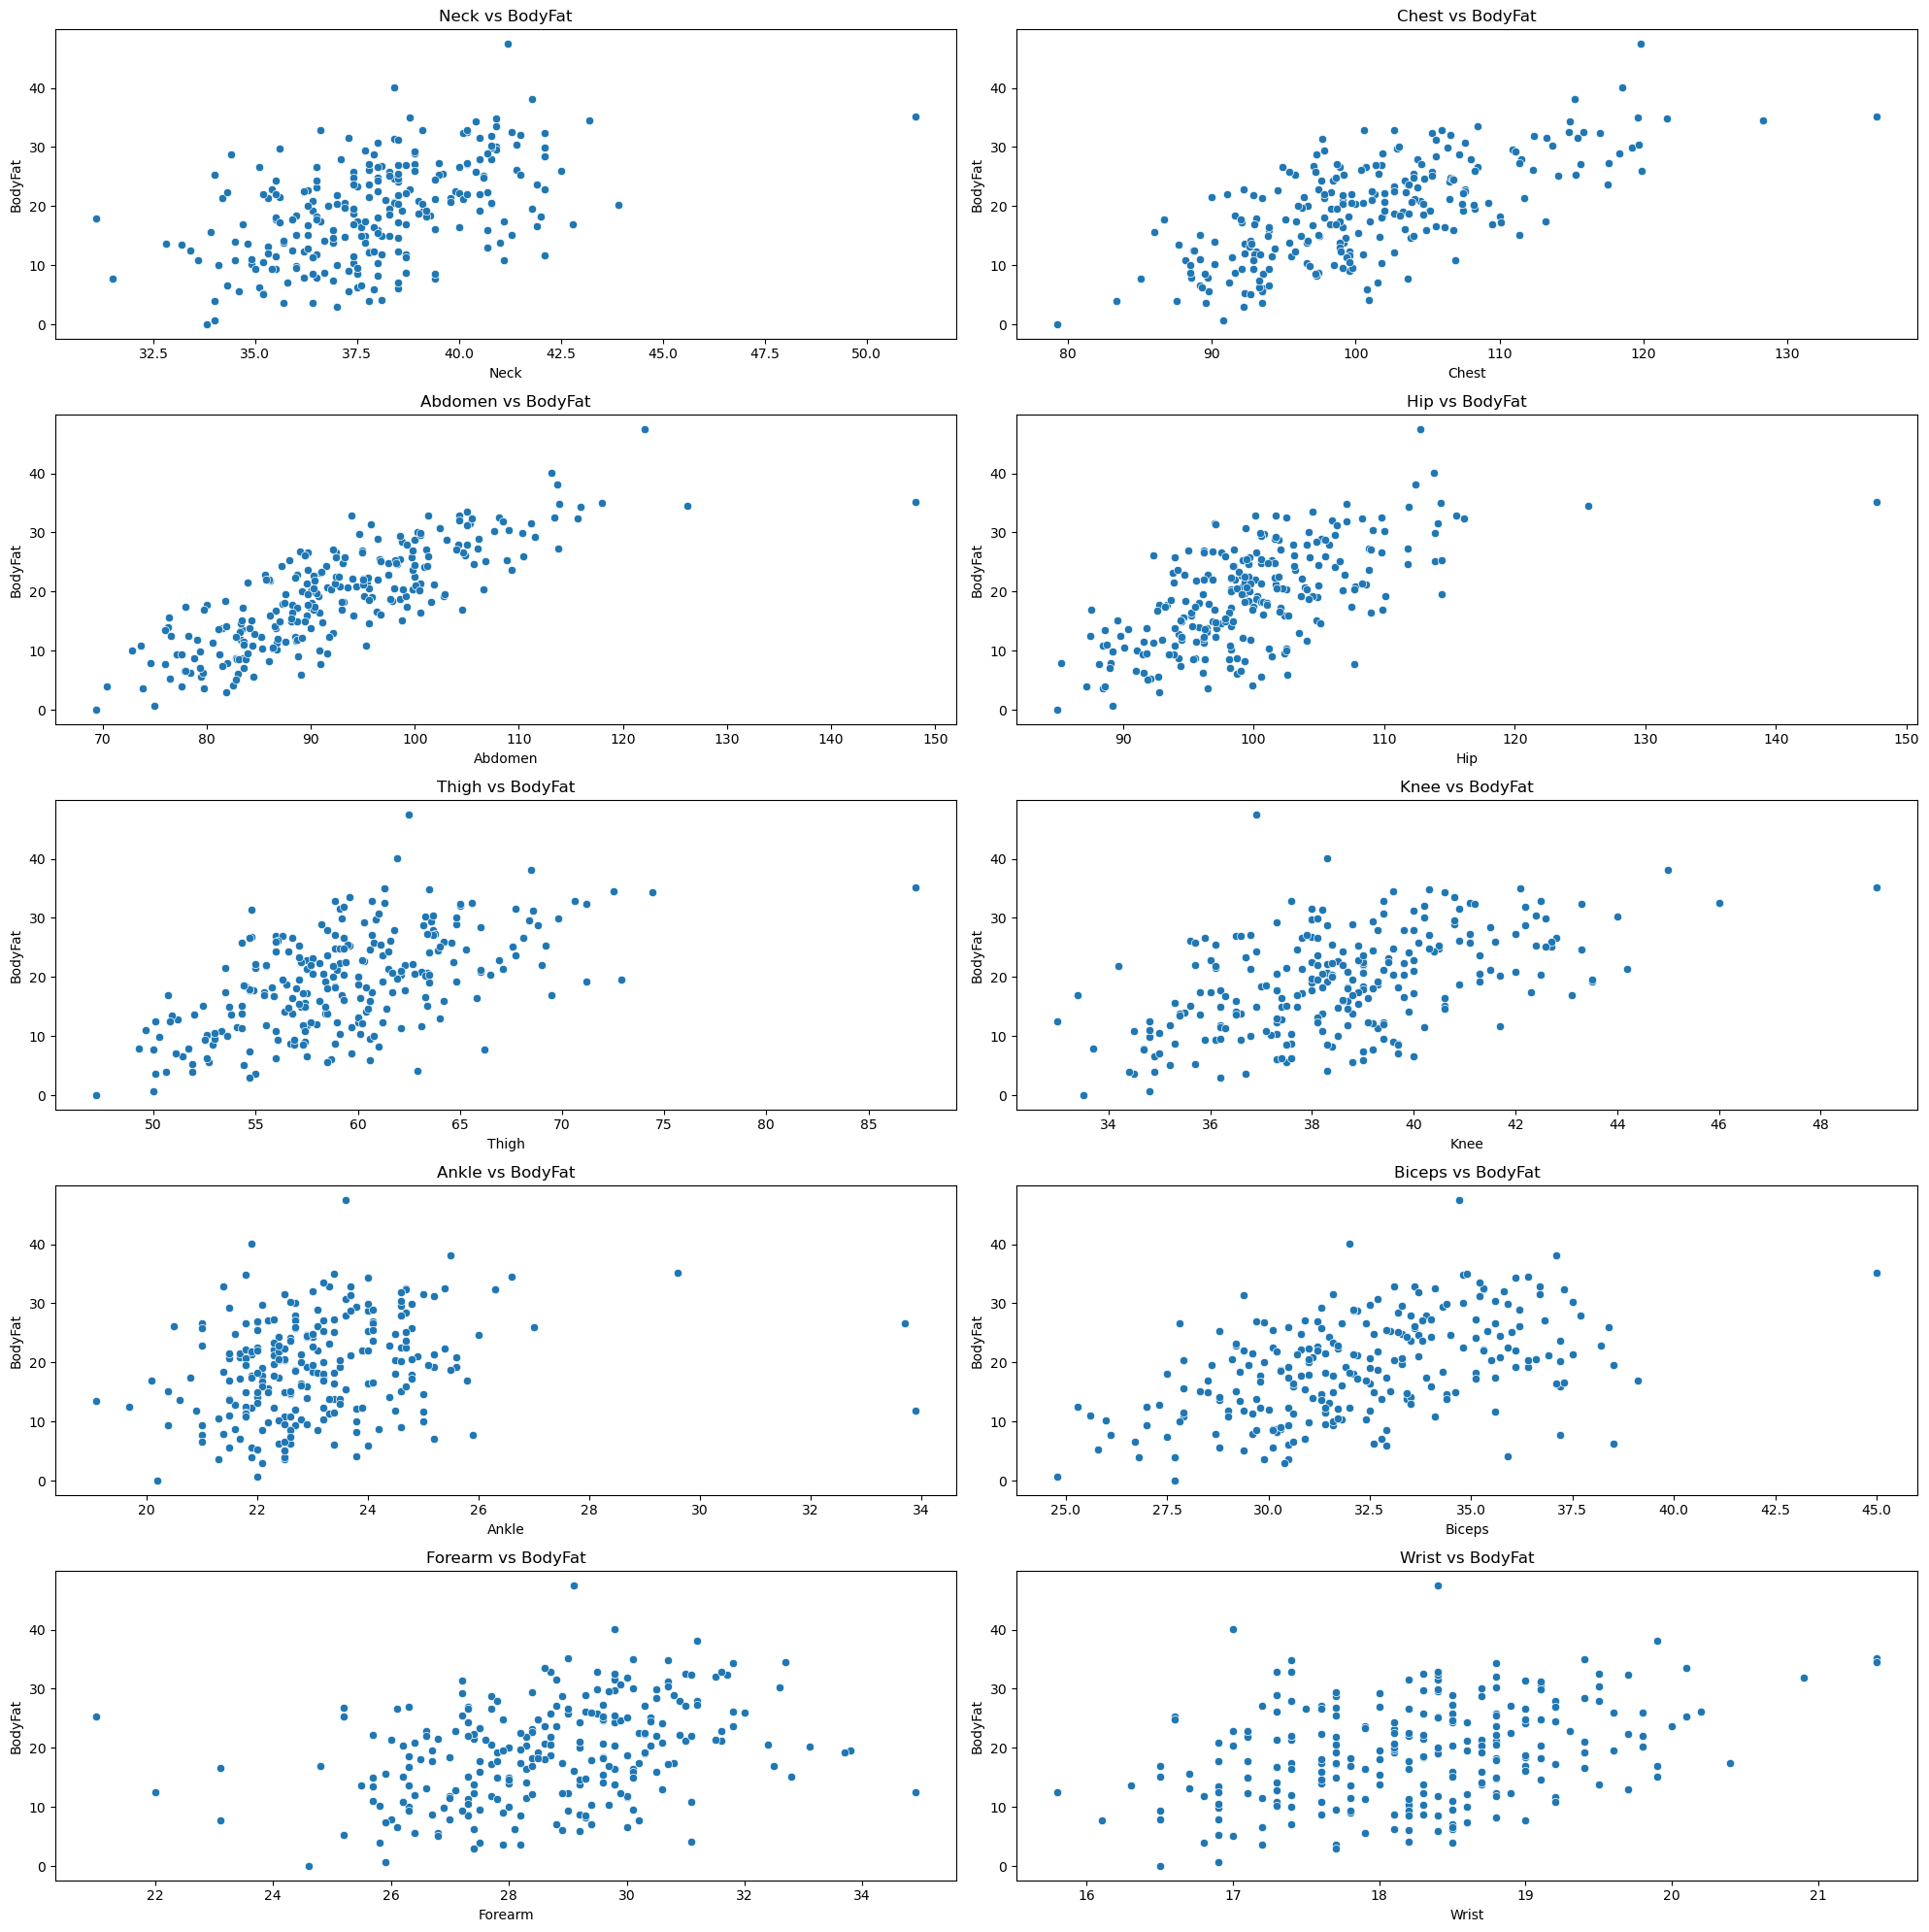

In [46]:
# Configuração do tamanho da figura
plt.figure(figsize=(20, 20))

# Criar gráficos de dispersão para cada variável em relação à BodyFat
for i, var in enumerate(variables, 1):
    plt.subplot(5, 2, i)
    sns.scatterplot(x=data[var], y=data['BodyFat'])
    plt.title(f'{var} vs BodyFat')
    plt.xlabel(var)
    plt.ylabel('BodyFat')

# Ajustar o layout para melhor visualização
plt.tight_layout()
plt.show()

# Calcular correlações
correlations = data[['BodyFat'] + variables].corr()['BodyFat'].drop('BodyFat')

In [43]:
correlations

Neck       0.490592
Chest      0.702620
Abdomen    0.813432
Hip        0.625201
Thigh      0.559608
Knee       0.508665
Ankle      0.265970
Biceps     0.493271
Forearm    0.361387
Wrist      0.346575
Name: BodyFat, dtype: float64

## Questão 3
Dos resultados encontrados, qual você indicaria para compor um modelo numérico para prever a gordura corporal? Explique os motivos da escolha baseados nas informações calculadas anteriormente.

Resposta: Eu indicaria utilizar as variáveis de Abdomen, Chest e Hip. Pois a correlação entre essas variaveis e o bodyfat é muito forte, Respectivamente: 0,81; 0,70; 0,62.

## Questão 4
A partir das informações anteriores, tente achar uma reta de regressão com as variáveis encontradas no item anterior (regressão múltipla).

In [54]:
X = data[['Abdomen', 'Chest', 'Hip']]
y = data['BodyFat']

# Adicionando uma constante para o termo de intercepto
X = sm.add_constant(X)

# Ajustando o modelo de regressão linear múltipla
model = sm.OLS(y, X).fit()

# Resumo do modelo
model_summary = model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     192.2
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           2.07e-64
Time:                        11:16:15   Log-Likelihood:                -741.05
No. Observations:                 252   AIC:                             1490.
Df Residuals:                     248   BIC:                             1504.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.0918      5.213     -2.703      0.0